## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής
## Μηχανική Μάθηση- Ανάλυση Μεγάλων Δεδομένων
# Graduate Admission
                                                                                              ΙΩΑΝΝΙΔΗΣ ΠΕΤΡΟΣ 71444277

## ΕΙΣΑΓΩΓΗ

Γνωρίζουμε πόσο σημαντικές είναι οι σπουδές,οι βαθμοί και οι γνώσεις που αποκομίζει ένας φοιτητής κατά την φοιτητική περίοδο της ζωής του.Σκοπός αυτών είναι, ύστερα απο τις σπουδές του να βγεί ενεργά στην αγορά εργασίας ή ακομα και να ακολουθήσει ενα μεταπτυχιακό πρόγραμμα σπουδών.Το συγκεκριμένο Dataset το οποίο θα αναλύσουμε και στο οποίο θα κάνουμε την γραμμική παλινδρόμηση(Linear reggresion) έχει να κάνει με την δημιουργία ενός προφίλ του κάθε φοιτητή, αποτελούμενο απο κάποια χαρακτηριστικά, τα οποία θα καθορίσουν την πιθανότητα να τον δεχτούν στις μεταπτυχιακές σπουδές όπου θέλει να ακολουθήσει.Ας δούμε ποία είναι αυτά τα χαρακτηριστικά:   

    1)GREScore - Γενικό τεστ το οποίο μετρά τον συλλογισμό του υποψηφίου, την κριτική του σκέψη και τις δεξιότητες γραφής
    2)TOEFLScore - Τεστ αγγλικών γνώσεων
    3)UniversityRating - Βαθμολογία πανεπηστημίου απο το οποίο αποφοίτησε
    4)Statement of Purpose(SOP) - Εκδήλωση ενδιαφέροντος του υποψηφίου
    5)Letter of Recommendation Strength(LOP) - Συστατικές επιστολές για τον υποψήφιο
    6)Undergraduate GPA(CGPA) - Βαθμός πτυχίου
    7)Research - Έρευνα
    8)ChanceOfAdmit - Πιθανότητες αποδοχής του υποψηφίου για την ένταξή του στο μεταπτυχιακό πρόγραμμα σπουδών
    
Υπάρχουν λοιπόν 7 χαρακτηριστικά τα οποία καθορίζουν το ChanceOfAdmit του κάθε υποψηφίου.Aς δούμε στην συνέχεια ποια απ'άυτα παίζουν σημαντικότερο ρόλο.


## Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data/admission.csv")

### Βλέπουμε παρακάτω οτι το Dataset αποτελείται απο 500 φοιτητές με 9 χαρακτηριστικά.Στην πραγματικότητα είναι 8 αυτά που μας ενδιαφέρουν κι αυτά που θα λάβουμε υπόψην, καθώς το SerialNo δεν επηρεάζει και δεν έχει κανέναν ρόλο για την αποδοχή ή μη του υποψήφιου

In [3]:
data.shape

(500, 9)

In [4]:
data.head()

,SerialNo,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Πρωτού περάσουμε σε περισσότερη ανάλυση πρέπει πρώτα να τσεκάρουμε αν υπάρχει κάποιο σφάλμα στα δεδομένα μας

In [5]:
data.isnull().any()

SerialNo            False
GREScore            False
TOEFLScore          False
UniversityRating    False
SOP                 False
LOR                 False
CGPA                False
Research            False
ChanceOfAdmit       False
dtype: bool

In [6]:
data.describe()

,SerialNo,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Εμφανίζουμε ενα ολοκληρομένο πλαίσιο με ολα τα γραφήματα όπου μπορούμε να τα μελετήσουμε σε σχέση με το ChanceOfAdmit αλλά και οχι μόνο. Ας αναλύσουμε κάποια απ'αυτά:
### Μπορούμε ήδη διαγραμματικά να παρατηρήσουμε οτι το GREScore,TOEFELScore και CGPA παίζουν σημαντικό ρόλο στο ChanceOfAdmit καθώς όσο μεγαλύτερη η βαθμολογία αυτών τόσο και περισσότερες οι πιθανότητες να τους δεχτούν


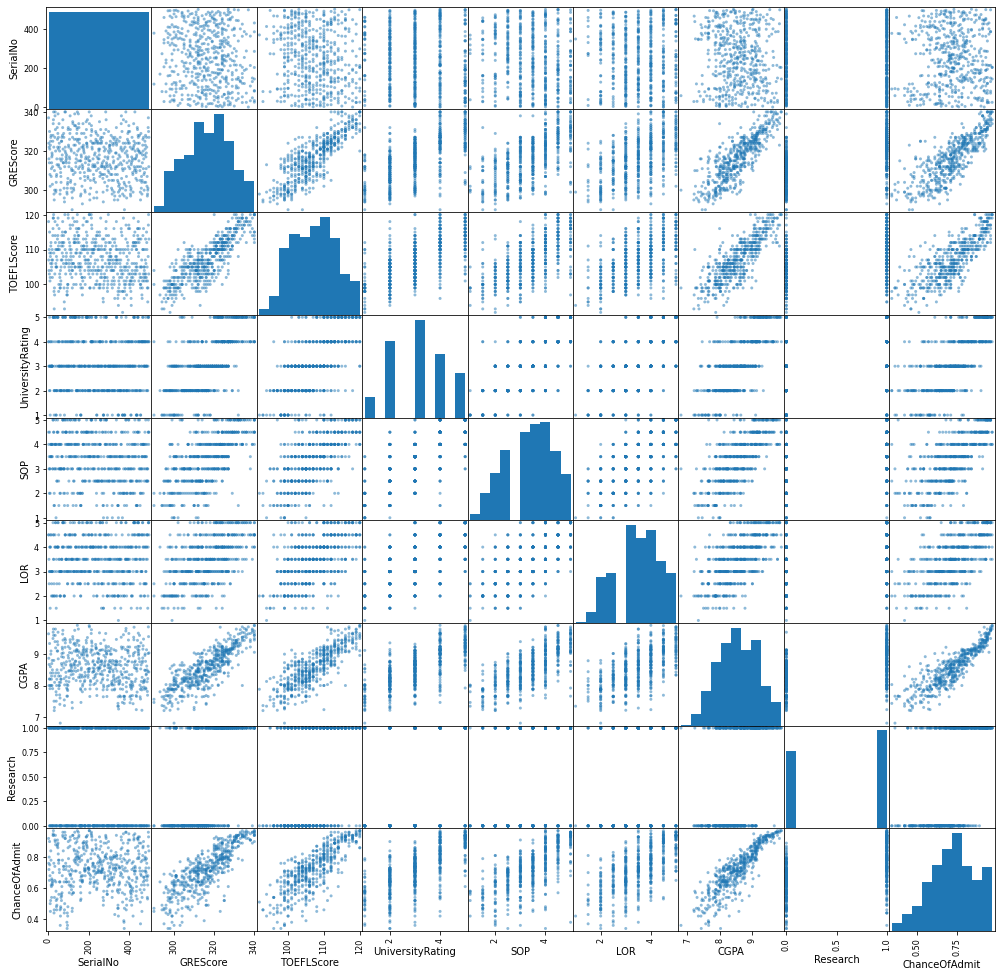

In [7]:
pd.plotting.scatter_matrix(data, figsize=(17, 17));

### Όλες οι τιμές είναι συνεχής εκτός απο το Research όπου είναι κατηγορηματική και παίρνει τιμές 0 και 1 δηλ. 0 αν δεν έχει κάνει κάποια έρευνα και 1 αν έχει κάνει

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SerialNo          500 non-null    int64  
 1   GREScore          500 non-null    int64  
 2   TOEFLScore        500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   ChanceOfAdmit     500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Διάγραμμα σχετικά με την πιθανότητα αποδοχής. Η εύρεση του γίνεται ως εξής:
### Έστω οτι παίρνουμε το 0.6 ChanceOfAdmit (δηλ. 60%) για να βρούμε το ποσοστό των φοιτητών όπου έχουν 60% πιθανότητα να τους δεχτούν κάνουμε βάση * ύψος = (0.65-0.60) * 2 = 0.05 * 2 = 10% των φοιτητών έχουν 60% πιθανότητα να τους δεχτούν

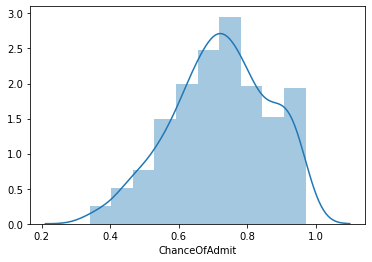

In [10]:
sns.distplot(data['ChanceOfAdmit'], bins=10)

### Σημαντικά διαγράμματα όπου μας δείχνουν τον αριθμό των φοιτητών σε συνάρτηση με την βαθμολογία τους για κάθε χαρακτηριστικό ξεχωριστά

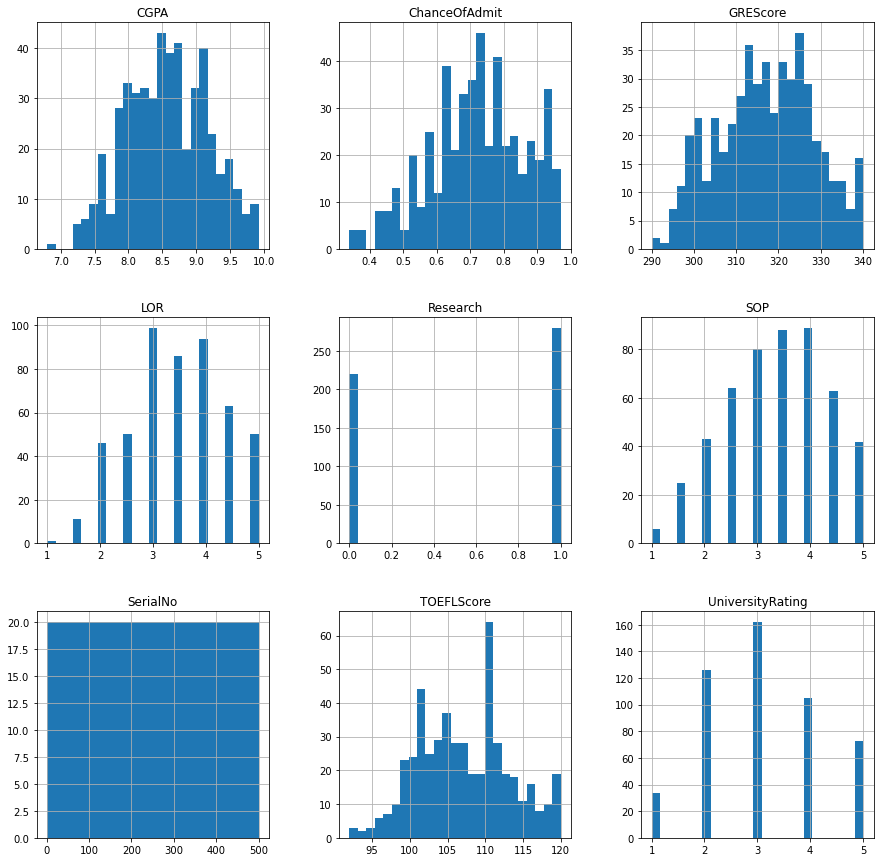

In [11]:
data.hist(bins=25, figsize=(15, 15));

### Πλαίσιο γραφημάτων χαρακητριστικών σε σχέση με το Research
### Παρατηρούμε πως το Research έχει επίδραση στο ChanceOfAdmit αλλά οχι καθοριστική,αφού βλέπουμε πως και κάποιοι φοιτητές χωρίς να έχουν κάνει έρευνα (μπλε χρώμα) έχουν καλές πιθανότητες αποδοχής

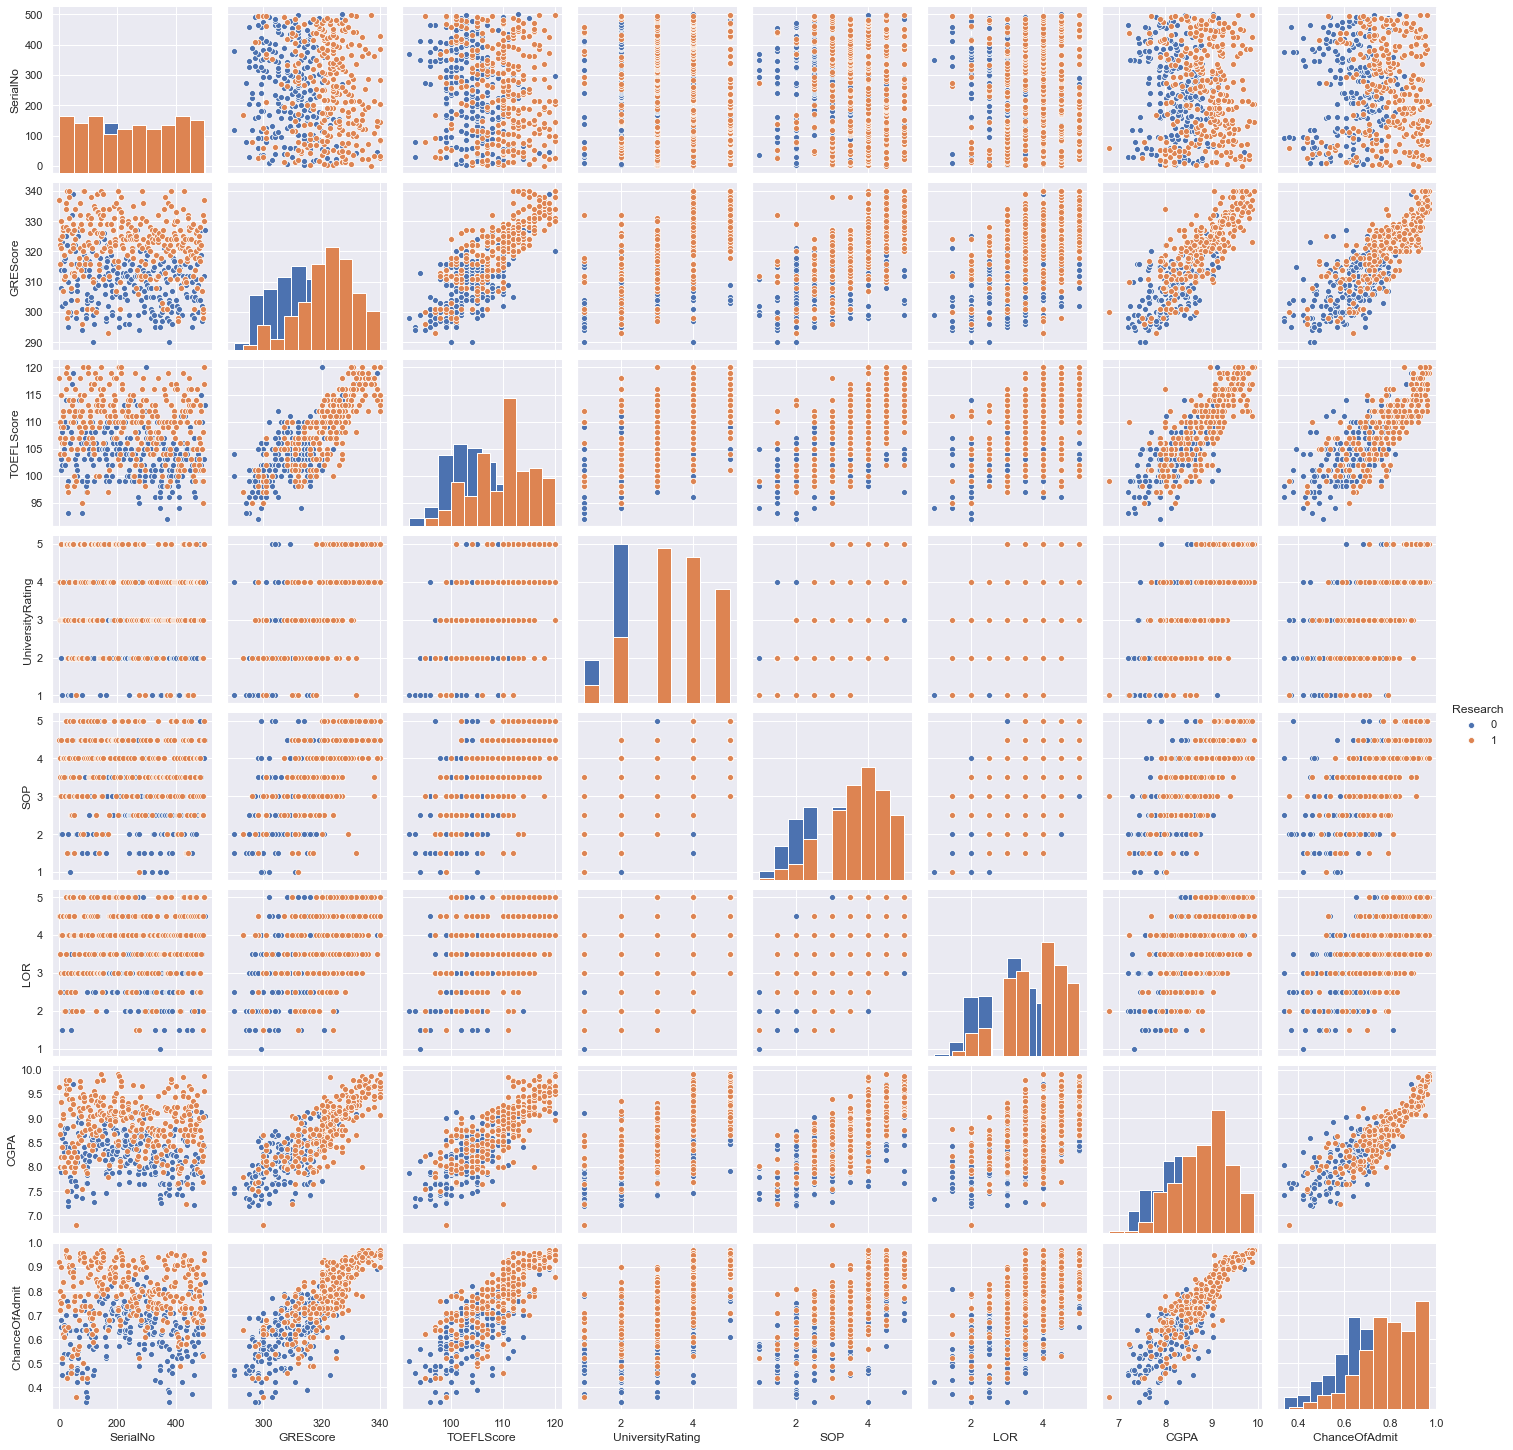

In [31]:
sns.set()
sns.pairplot(data,diag_kind='hist',hue ='Research')
plt.show()

### Το heatmap είναι η πιο σημαντική απεικόνιση συσχέτησης.
### Εύκολα μπορούμε να καταλάβουμε οτι πρώτα το CGPA μετά το GREScore και ύστερα το TOEFLScore είναι τα 3 χαρακτηριστικά που παίζουν μεγαλύτερο ρόλο για το ChanceOfAdmit(όσο πιο κοντά στην μονάδα τόσο πιο σημαντικό)

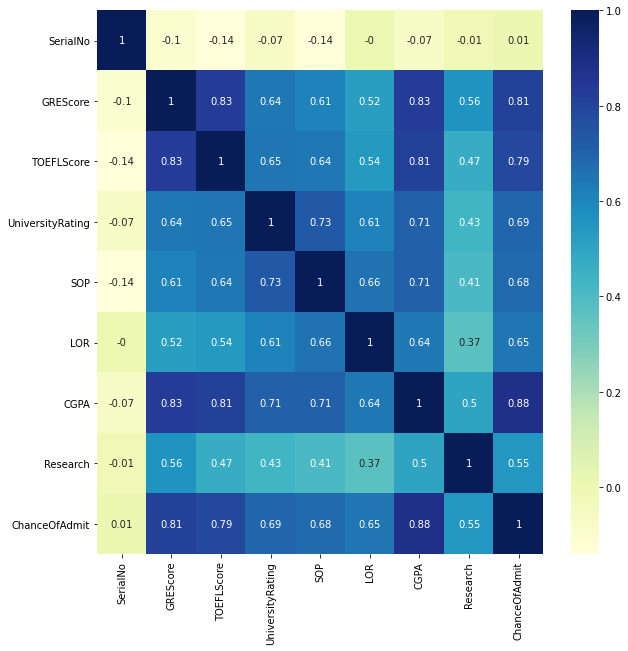

In [12]:
correlation_matrix = data.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

### Ξεκινάμε την παλινδρόμηση με ολα τα χαρακτηριστικά για αρχή και με test size 0.3 όπως κάναμε και στο προηγούμενο dataset

In [20]:
X=data[['GREScore' , 'TOEFLScore' , 'UniversityRating' , 'SOP' , 'LOR' , 'CGPA' , 'Research' ]]
y=data['ChanceOfAdmit']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
linregressor = LinearRegression()

In [24]:
linregressor.fit(X_train, y_train)

LinearRegression()

### Παρατηρούμε την πρώτη τιμή η οποία είναι -1.269 , αυτό σημαίνει οτι σε περίπτωση που πάρουμε μηδενικές τιμές για ολα τα χαρακτηριστικά το ChanceOfAdmit έχει αυτήν την τιμή.Όμως αυτό ειναι πρακτικά αδύνατον αφού για παράδειγμα δεν γίνεται ο φοιτητής να έχει βαθμό πτυχιου(CGPA) μικρότερο του 5
### Επίσης οι τιμές στις αγκύλες αντιστοιχούν στο κάθε χαρακτηριστικό όπου κάναμε train.Δηλαδή η πρώτη τιμή αντιστοιχεί στο GREscore και αυτό που μας δείχνει σε γενικές γραμμές είναι πως αν 2 φοιτητές έχουν την ίδια βαθμολογία σε ολα και ο ένας απο τους 2 έχει κατα μια μονάδα καλύτερη βαθμολογία απο τον άλλον στο GREscore τότε έχει 0.15% ChanceOfAdmit

In [25]:
print(linregressor.intercept_)
print(linregressor.coef_)


-1.2692940878463963
[ 0.00151494  0.00307376  0.00896708 -0.00619142  0.01526955  0.12930964
  0.0229729 ]


### Οι τιμές που θέλουμε να δούμε με την παλινδρόμηση είναι το μέσο απόλυτο σφάλμα(Mean Absolute Error), το μέσο τετραγωνικό σφάλμα σε ρίζα(Root Mean Squared Error) και το ποσοστό ευστοχίας δηλ. ο δείκτης r^2
### Κάνοντας train ολα τα χαρακτηριστικά παίρνουμε ενα πολύ καλό ποσοστό επιτυχίας της τάξεως του 83.3% καθώς και έχουμε μια μικρή απόκλιση(mae=0.04311)

In [26]:
from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

# mean absolute error
mae=metrics.mean_absolute_error(y_test, y_pred_test)
# root mean square error του μοντέλου
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
# r-squared score του μοντέλου
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error=  0.04311384143179334
Root Mean Squared Error =  0.06170748106061352
R2 score =  0.8330100490780517


### Στην πορεία κάνοντας undefitting με διαφορετικά χαρακτηριστικά μπορούμε να δούμε ποίο απ αυτά παίζει μεγαλύτερο ρόλο στο ChanceOfAdmit

In [18]:
X=data[['GREScore' ,'CGPA' ,'Research' ]]
y=data['ChanceOfAdmit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

linregressor.fit(X_train, y_train)

print(linregressor.intercept_)
print(linregressor.coef_)

from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

-1.4207988855438494
[0.00239242 0.15988927 0.0232159 ]
Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error=  0.046608006129925314
Root Mean Squared Error =  0.06457798727773617
R2 score =  0.8171126319067459


In [27]:
X=data[['GREScore' ,'CGPA' ,'TOEFLScore' ]]
y=data['ChanceOfAdmit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

linregressor.fit(X_train, y_train)

print(linregressor.intercept_)
print(linregressor.coef_)

from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

-1.56396710262527
[0.00215989 0.14834683 0.00306979]
Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error=  0.04609576852534481
Root Mean Squared Error =  0.06504982933299515
R2 score =  0.8144303182989551


In [28]:
X=data[['GREScore' ,'CGPA' ,'UniversityRating' ]]
y=data['ChanceOfAdmit']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=17)

linregressor.fit(X_train, y_train)

print(linregressor.intercept_)
print(linregressor.coef_)

from sklearn import metrics
y_pred_test = linregressor.predict(X_test)

mae=metrics.mean_absolute_error(y_test, y_pred_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)
linregressor.score(X_test, y_test)

print("Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)  
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',linregressor.score(X_test, y_test))

-1.4467701462018248
[0.00267504 0.14948765 0.01257111]
Οι επιδόσεις του μοντέλου για τα δεδομένα τεστ
--------------------------------------
Mean Absolute Error=  0.04588598839189061
Root Mean Squared Error =  0.06494967328805994
R2 score =  0.8150013149445428


### Με κάποιες δοκιμές που κάναμε φαίνεται οτι πετύχαμε μεγαλύτερο ποσοστό με ολα τα χαρακτηριστικά μάζι αλλά παρατηρήσαμε οτι κάποια απ αυτά δεν εχούν μεγάλη επίδραση στην αλλαγή του ποσοστού

## ΣΥΜΠΕΡΑΣΜΑ

Έχοντας το συγκεκριμένο Dataset με 500 φοιτητές και 8 χαρακτηριστικά, καταφέραμε με την μέθοδο της παλινδρόμησης να πετύχουμε ενα πολύ καλό ποσοστό(περίπου 83%) με ολα τα χαρακτηριστικά.Παρόλα αυτά παρατηρήσαμε οτι 2 απο αυτα(GREScore,CGPA) έπαιζαν μεγαλύτερο ρόλο για το ChanceOfAdmit(περιπου 80%) που σημάινει οτι τα υπόλοιπα 6 συμμετείχαν μόλις στο 3%.Με την τεχνική αυτή της μηχανικής μάθησης καταφέραμε σε σύντομο χρονικό διάστημα να κάνουμε την πρόβλεψη, το οποίο δεν θα μπορούσαμε να το κάνουμε αλλιώς και θα ήταν απίστευτα χρονοβόρο.Τέλος το Dataset αυτό δημιουργούσε ενα πλήρες προφιλ του φοιτητή και δεν νομίζω οτι υπάρχει κάποιο άλλο χαρακτηριστικό να λάβουμε υπόψην για την πιθανότητα αποδοχής του σε μεταπτυχιακές σπουδές.